<font size = 5><b>Ethereum Price Prediction Using Linear Regression

In [182]:
# Import the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [183]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [184]:
# Load dataset
df = pd.read_csv("Ethereum.csv")
df.head()

,timestamp,open,high,low,close
0,1635724800,4295.350000,4377.057021011002,4166.283329212807,4326.88
1,1635724740,4290.160000,undefined,undefined,undefined
2,1635638400,4328.810000,4395.1,4176.37,4288.647863307195
3,1635638340,4325.869542,undefined,undefined,undefined
4,1635552000,4426.660000,4427.491984588295,4251.859043408258,4319.030758213976


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  890 non-null    int64  
 1   open       890 non-null    float64
 2   high       890 non-null    object 
 3   low        890 non-null    object 
 4   close      890 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 34.9+ KB


In [186]:
# Convert timestamp to datetime format
df['Date'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,timestamp,open,high,low,close,Date
0,1635724800,4295.350000,4377.057021011002,4166.283329212807,4326.88,2021-11-01 00:00:00
1,1635724740,4290.160000,undefined,undefined,undefined,2021-10-31 23:59:00
2,1635638400,4328.810000,4395.1,4176.37,4288.647863307195,2021-10-31 00:00:00
3,1635638340,4325.869542,undefined,undefined,undefined,2021-10-30 23:59:00
4,1635552000,4426.660000,4427.491984588295,4251.859043408258,4319.030758213976,2021-10-30 00:00:00


In [187]:
# Drop timestamp column
df = df.drop('timestamp', axis=1)
df.head()

,open,high,low,close,Date
0,4295.350000,4377.057021011002,4166.283329212807,4326.88,2021-11-01 00:00:00
1,4290.160000,undefined,undefined,undefined,2021-10-31 23:59:00
2,4328.810000,4395.1,4176.37,4288.647863307195,2021-10-31 00:00:00
3,4325.869542,undefined,undefined,undefined,2021-10-30 23:59:00
4,4426.660000,4427.491984588295,4251.859043408258,4319.030758213976,2021-10-30 00:00:00


In [188]:
# Remove time from Date column
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,open,high,low,close,Date
0,4295.350000,4377.057021011002,4166.283329212807,4326.88,2021-11-01
1,4290.160000,undefined,undefined,undefined,2021-10-31
2,4328.810000,4395.1,4176.37,4288.647863307195,2021-10-31
3,4325.869542,undefined,undefined,undefined,2021-10-30
4,4426.660000,4427.491984588295,4251.859043408258,4319.030758213976,2021-10-30


In [189]:
# Remove duplicate columns in Date column and keep the last data only
df = df.drop_duplicates(subset=['Date'], keep='last')
df.head()

,open,high,low,close,Date
0,4295.350000,4377.057021011002,4166.283329212807,4326.88,2021-11-01
2,4328.810000,4395.1,4176.37,4288.647863307195,2021-10-31
4,4426.660000,4427.491984588295,4251.859043408258,4319.030758213976,2021-10-30
6,4287.945607,4460.505640780439,4271.599874791511,4415.427223930739,2021-10-29
8,3923.735710,4292.487326799081,3903.4155618532495,4288.391931811509,2021-10-28


In [190]:
# Rearrange columns
df = df[['Date', 'open', 'high', 'low', 'close']]
df

,Date,open,high,low,close
0,2021-11-01,4295.350000,4377.057021011002,4166.283329212807,4326.88
2,2021-10-31,4328.810000,4395.1,4176.37,4288.647863307195
4,2021-10-30,4426.660000,4427.491984588295,4251.859043408258,4319.030758213976
6,2021-10-29,4287.945607,4460.505640780439,4271.599874791511,4415.427223930739
8,2021-10-28,3923.735710,4292.487326799081,3903.4155618532495,4288.391931811509
...,...,...,...,...,...
885,2019-11-05,186.014259,191.49107098116528,182.75722501380642,188.57189023904337
886,2019-11-04,181.754128,188.48499194130918,180.50852582145654,186.0366022657388
887,2019-11-03,183.180856,184.70363890898787,179.174617500019,181.4487418655548
888,2019-11-02,183.673454,185.15915224019622,181.84936585578478,182.99855083804877


In [191]:
df[['high', 'low', 'close']] = df[['high', 'low', 'close']].astype(float)
df.head()

,Date,open,high,low,close
0,2021-11-01,4295.350000,4377.057021,4166.283329,4326.880000
2,2021-10-31,4328.810000,4395.100000,4176.370000,4288.647863
4,2021-10-30,4426.660000,4427.491985,4251.859043,4319.030758
6,2021-10-29,4287.945607,4460.505641,4271.599875,4415.427224
8,2021-10-28,3923.735710,4292.487327,3903.415562,4288.391932


In [192]:
# Round off to 2 decimal places
df[['open', 'high', 'low', 'close']] = df[['open', 'high', 'low', 'close']].round(decimals=2)
df.head()

,Date,open,high,low,close
0,2021-11-01,4295.35,4377.06,4166.28,4326.88
2,2021-10-31,4328.81,4395.10,4176.37,4288.65
4,2021-10-30,4426.66,4427.49,4251.86,4319.03
6,2021-10-29,4287.95,4460.51,4271.60,4415.43
8,2021-10-28,3923.74,4292.49,3903.42,4288.39


In [193]:
# Sort by date
df = df.sort_values(by='Date')

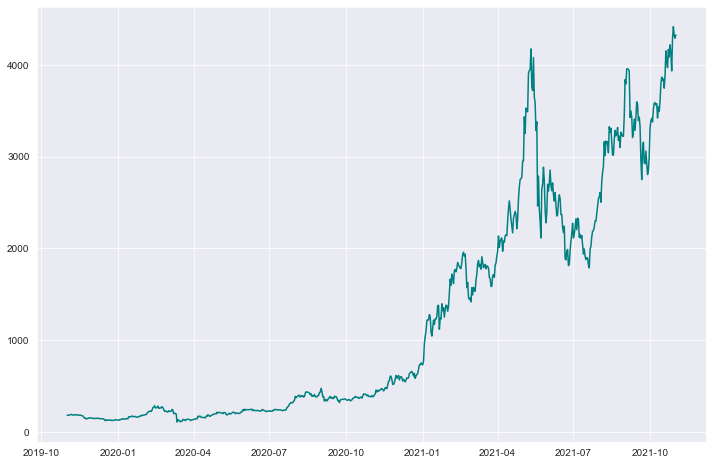

In [194]:
# Plot chart
sns.set_style('darkgrid')
plt.plot(df['Date'], df['close'], color='teal')

In [195]:
# Create new column for predictions
projection = 7
df["Prediction"] = df[["close"]].shift(-projection)
df.tail(10)

,Date,open,high,low,close,Prediction
17,2021-10-23,3971.50,4171.18,3942.78,4168.66,4319.03
16,2021-10-24,4168.51,4182.76,3966.10,4085.63,4288.65
14,2021-10-25,4082.28,4235.55,4070.27,4218.04,4326.88
12,2021-10-26,4220.82,4290.61,4102.07,4128.74,NaN
10,2021-10-27,4131.25,4299.43,3928.28,3933.19,NaN
8,2021-10-28,3923.74,4292.49,3903.42,4288.39,NaN
6,2021-10-29,4287.95,4460.51,4271.60,4415.43,NaN
4,2021-10-30,4426.66,4427.49,4251.86,4319.03,NaN
2,2021-10-31,4328.81,4395.10,4176.37,4288.65,NaN
0,2021-11-01,4295.35,4377.06,4166.28,4326.88,NaN


In [196]:
# Create dataset called X
X = np.array(df[['close']])
X = X[:-projection]
print(X)

[[ 183.04]
 [ 183.  ]
 [ 181.45]
 [ 186.04]
 [ 188.57]
 [ 191.31]
 [ 186.58]
 [ 183.8 ]
 [ 184.85]
 [ 189.08]
 [ 184.91]
 [ 186.92]
 [ 188.07]
 [ 184.76]
 [ 180.04]
 [ 182.3 ]
 [ 183.85]
 [ 178.23]
 [ 175.88]
 [ 174.57]
 [ 160.97]
 [ 149.69]
 [ 151.8 ]
 [ 140.13]
 [ 146.32]
 [ 147.5 ]
 [ 152.75]
 [ 150.9 ]
 [ 154.65]
 [ 151.65]
 [ 150.91]
 [ 149.02]
 [ 147.31]
 [ 145.58]
 [ 148.09]
 [ 148.58]
 [ 147.38]
 [ 150.64]
 [ 147.47]
 [ 145.63]
 [ 143.41]
 [ 144.88]
 [ 144.75]
 [ 141.9 ]
 [ 142.52]
 [ 132.64]
 [ 121.97]
 [ 132.74]
 [ 128.19]
 [ 128.3 ]
 [ 127.06]
 [ 132.3 ]
 [ 128.16]
 [ 127.8 ]
 [ 125.05]
 [ 125.64]
 [ 126.42]
 [ 128.05]
 [ 134.53]
 [ 131.43]
 [ 129.06]
 [ 130.56]
 [ 127.05]
 [ 133.9 ]
 [ 134.2 ]
 [ 135.4 ]
 [ 144.19]
 [ 143.06]
 [ 140.54]
 [ 137.8 ]
 [ 144.71]
 [ 142.76]
 [ 146.22]
 [ 143.53]
 [ 165.74]
 [ 166.3 ]
 [ 164.56]
 [ 170.07]
 [ 174.17]
 [ 166.98]
 [ 166.78]
 [ 169.39]
 [ 167.92]
 [ 162.84]
 [ 162.55]
 [ 160.22]
 [ 167.68]
 [ 170.1 ]
 [ 175.98]
 [ 173.54]
 [ 184.5 ]

In [197]:
y = df['Prediction'].values
y = y[:-projection]

In [198]:
# Split data 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [199]:
# Train the model
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [200]:
# Score the model
linReg_confidence = linReg.score(X_test, y_test)
print("Linear Regression Confidence:", linReg_confidence)

Linear Regression Confidence: 0.9617789393268583


In [201]:
# Predict values for the next 7 days
X_projection = np.array(df[['close']])[-projection:]
print(X_projection)

[[4128.74]
 [3933.19]
 [4288.39]
 [4415.43]
 [4319.03]
 [4288.65]
 [4326.88]]


In [202]:
# Predict for future dates(2021-11-02 - 2021-11-08)
linReg_prediction = linReg.predict(X_projection)
print(linReg_prediction)

[4175.31055754 3979.03767576 4335.55072924 4463.06035288 4366.30399489
 4335.81169037 4374.18301367]
